## The University of Melbourne, School of Computing and Information Systems
# COMP90049 Introduction to Machine Learning, 2020 Semester 2
-----
## Project 1: Predicting stroke with Naive Bayes and K-NN
-----
###### Student Name(s): Mayank Sharma (936970)
###### Python version: 3.6
###### Submission deadline: 11th Sept 2020 - 5 PM 

In [3135]:
# Libraries imported and used for the assignment 

import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import sklearn.metrics as met 
import math

from sklearn.neighbors import KNeighborsClassifier

In [3136]:
# Helper function to return name of headers in for a given dataset

def header_name(file_data):
    """Takes a file data as input and returns a list of header names"""
    
    headers = [header for header in file_data.columns.tolist()]
    
    return headers

In [3137]:
# Helper function to return the given dataset as a transposed matrix

def transpose_file_data(file_data):
    """Takes a file data as input and returns transposed matrix of the values"""
   
    values = np.transpose(file_data.values.tolist())
    
    return values

In [3138]:
# Function to plot a histgram (frequency vs a specific column values)

def hist_plotter(headers, values, index):
    """Takes headers, values and index as inputs and returns histogram"""
    
    mpl.title(headers[index])
    mpl.hist(np.array(values[index]))
    
    return mpl.show()

In [3156]:
# Function to plot histgram to show corelation between heart disease and stroke 

def hist_plotter_heart_disease_stroke(processed_data):
    """Takes processed data as input and returns a histogram as output"""
    
    no_heart_stroke = []
    no_heart_no_stroke = []
    heart_no_stroke = []
    heart_stroke = []
    
    heart_disease_stroke = processed_data.iloc[:,[5,10]]
    
    plotter_data = heart_disease_stroke.values.tolist()
    
    for index in range(len(plotter_data)):
        
        # Stores values for no heart disease and no stroke
        if plotter_data[index][0] == 0 and plotter_data[index][1] == 0:
            
            no_heart_no_stroke.append(0)
        
        # Stores values for no heart disease and but stroke
        elif plotter_data[index][0] == 0 and plotter_data[index][1] == 1:
        
            no_heart_stroke.append(1)
        
        # Stores values for heart disease and but no stroke
        elif plotter_data[index][0] == 1 and plotter_data[index][1] == 0:
            
            heart_no_stroke.append(2)
        
        # Stores values for heart disease and stroke
        elif plotter_data[index][0] == 1 and plotter_data[index][0] == 1:
            
            heart_stroke.append(3)
        
        # error input
        else:
            print("error")
    
    mpl.title('Graph of number of people verses combined set values of heart disease and stroke')
    mpl.xlabel('Set values of heart disease and stroke (00,01,10,11) Fig 4')
    mpl.ylabel('Number of people')
    mpl.hist(np.array(no_heart_no_stroke)) # column 0
    mpl.hist(np.array(no_heart_stroke)) # column 1
    mpl.hist(np.array(heart_no_stroke)) # column 2
    mpl.hist(np.array(heart_stroke)) # column 3
    mpl.xlim([0,4])
    mpl.xticks(np.arange(0,4,1))
    
    return mpl.show()

In [3157]:
# Function to plot histgram to show corelation between hyper tension and stroke

def hist_plotter_hypertension_stroke(processed_data):
    """Takes processed data as input and returns a histogram as output"""
    
    no_hyper_no_stroke = []
    no_hyper_stroke = []
    hyper_no_stroke = []
    hyper_stroke = []
    
    hypertension_stroke = processed_data.iloc[:,[4,10]]
    
    plotter_data = hypertension_stroke.values.tolist()
    
    for index in range(len(plotter_data)):
        
        # Stores values for no hyper tension and no stroke
        if plotter_data[index][0] == 0 and plotter_data[index][1] == 0:
            
            no_hyper_no_stroke.append(0)
        
        # Stores values for no hyper tension and but stroke
        elif plotter_data[index][0] == 0 and plotter_data[index][1] == 1:
        
            no_hyper_stroke.append(1)
        
        # Stores values for hyper tension and but no stroke
        elif plotter_data[index][0] == 1 and plotter_data[index][1] == 0:
            
            hyper_no_stroke.append(2)
        
        # Stores values for hyper tension and stroke
        elif plotter_data[index][0] == 1 and plotter_data[index][0] == 1:
            
            hyper_stroke.append(3)
        
        # error input
        else:
            print("error")
    
    mpl.title('Graph of number of people verses combined set values of hyper tension and stroke')
    mpl.xlabel('Set values of hyper tension and stroke (00,01,10,11) Fig 2')
    mpl.ylabel('Number of people')
    mpl.hist(np.array(no_hyper_no_stroke)) # column 0
    mpl.hist(np.array(no_hyper_stroke)) # column 1
    mpl.hist(np.array(hyper_no_stroke)) # column 2
    mpl.hist(np.array(hyper_stroke)) # column 3
    mpl.xlim([0,4])
    mpl.xticks(np.arange(0,4,1))
    
    return mpl.show()

In [3158]:
# Function to plot histgram to show corelation between smoking status and stroke

def hist_plotter_smoking_stroke(processed_data):
    """Takes processed data as input and returns a histogram as output"""
    
    never_smoked_no_stroke = []
    never_smoked_stroke = []
    formerly_smoked_no_stroke = []
    formerly_smoked_stroke = []
    smokes_no_stroke = []
    smokes_stroke = []
    
    smoking_stroke = processed_data.iloc[:,[9,10]]
    
    plotter_data = smoking_stroke.values.tolist()
    
    for index in range(len(plotter_data)):
        
        # Stores values for never smoked and no stroke
        if plotter_data[index][0] == 1 and plotter_data[index][1] == 0:
            
            never_smoked_no_stroke.append(0)
            
        # Stores values for never smoked and stroke
        elif plotter_data[index][0] == 1 and plotter_data[index][1] == 1:
        
            never_smoked_stroke.append(1)
        
        # Stores values for formally smoked and no stroke
        elif plotter_data[index][0] == 0 and plotter_data[index][1] == 0:
            
            formerly_smoked_no_stroke.append(2)
        
        # Stores values for formally smoked and stroke
        elif plotter_data[index][0] == 0 and plotter_data[index][1] == 1:
            
            formerly_smoked_stroke.append(3)
            
        # Stores values for smokes and no stroke
        elif plotter_data[index][0] == 2 and plotter_data[index][1] == 0:
        
            smokes_no_stroke.append(4)
        
        # Stores values for smokes and stroke
        elif plotter_data[index][0] == 2 and plotter_data[index][1] == 1:
        
            smokes_stroke.append(5)
        
        else:
            print("error")
    
    mpl.title('Graph of number of people verses combined set values of smoking status and stroke')
    mpl.xlabel('Set values of smoking status and stroke (formally0,formaly1,never0,never1,smokes1,smokes1) Fig 6')
    mpl.ylabel('Number of people')
    mpl.hist(np.array(never_smoked_no_stroke)) # column 0
    mpl.hist(np.array(never_smoked_stroke)) # column 1
    mpl.hist(np.array(formerly_smoked_no_stroke)) # column 2
    mpl.hist(np.array(formerly_smoked_stroke)) # column 3
    mpl.hist(np.array(smokes_no_stroke)) # column 4
    mpl.hist(np.array(smokes_stroke)) # column 5
    mpl.xlim([0,6]) 
    mpl.xticks(np.arange(0,6,1))
    
    return mpl.show()

In [3159]:
# Helper function to get instances of file data
def total_instances(file_data):
    """Takes inputs as file_data and returns instances"""
    n_instances = len(file_data.columns) - 1
    
    instances = file_data.iloc[:,:n_instances]
    
    return instances

In [3160]:
# Helper function to get labels of file data
def total_labels(file_data):
    """Takes input as file_data and returns labels"""
    labels = file_data.iloc[:,[-1]]
    
    return labels

In [3161]:
# This function should transform data into a usable format 
def preprocess(csv_file_name):
    """Takes input as a csv file and returns the file_data"""
    file_data = pd.read_csv(csv_file_name)
    
    # Convert continuous values to categorical values by grouping them in groups of 5 with fixed width
    # Renames the groups with labels
    file_data["avg_glucose_level"] = pd.cut(file_data["avg_glucose_level"], bins=5, labels=["VeryLow","Low","Medium","High","VeryHigh"])
    file_data["bmi"] = pd.cut(file_data["bmi"], bins=5, labels=["VeryLow","Low","Medium","High","VeryHigh"])
    file_data["age"] = pd.cut(file_data["age"], bins=5, labels=["Young","Adults","MiddleAged","OlderAdults","Elderly"])
    
    # Converts the labels to integer values
    # Code adapted from week 4 code demo
    # Code modified to be used with dataframe structure rather than list
    for attributes in file_data.columns:
        values = sorted(set([value for value in file_data[attributes].values])) 
        temp_dict = dict(zip(values, range(len(values))))
        file_data[attributes] = file_data[attributes].map(lambda key: temp_dict.get(key) if key in temp_dict else key)
    
    return file_data

In [3162]:
# This function should split a data set into a training set and hold-out test set
def split_data(file_data, ratio):
    """Takes file data and ratio of split as input and returns training data and testing data"""
    
    # Splits file data into training data and testing data
    train_data = file_data.sample(frac=ratio)
    test_data = file_data.drop(train_data.index)
    
    # Reorder the index
    reordered_train_data = train_data.reset_index(drop=True)
    reordered_test_data = test_data.reset_index(drop=True)
    
    return reordered_train_data,reordered_test_data

In [3163]:
# Helper function to return total counts of class labels
#
def class_count(labels):
    "Takes input as labels and returns count of class labels"
    
    class_labels = [0] * len(set([counts for column in labels.columns for counts in labels[column].values]))
    
    # Counting values for each label and storing in index
    for column in labels.columns: 
        for index in labels[column].index:
            class_labels[labels.at[index,column]] += 1
        
    return class_labels

In [3164]:
# Helper function to calculate prior probability P(y=i) = count(i) / N
def prior_probability(labels):
    """Takes input as labels and returns the prior probability"""
    N = len(labels.index)
    
    class_labels = class_count(labels)
    
    prior = [index / N for index in class_labels]
        
    return prior

In [3165]:
# Helper function to calculate the likelihoods p(x=j|y=i) = count(i,j)/count(i)
# Code adapted from week 4 code demo. Code modified to be used with dataframe structure rather than list

def likelihoods(attributes,labels,epsilon):
    """Takes attributes, labels and epsilon value and returns a dictionary of conditional probabilities"""
    
    class_labels = [counts for column in labels.columns for counts in labels[column].values]
    
    stroke = {index:{} for index in range(len(set(class_labels)))}
    
    # Initialising the dictionary with 0
    for label in stroke.keys():
        for attribute in attributes.columns:
            stroke[label][attribute] = {values:0 for values in set(attributes[attribute].values)}
    
    # Counting values for each attribute and storing in the dictionary
    for attribute in attributes.columns:
        for index in attributes[attribute].index:
            stroke[class_labels[index]][attribute][attributes.at[index,attribute]] += 1
    
    # Calculates probability by dividing bt prior probability
    for label in stroke.keys():
        for attribute in stroke[label].keys():
            for value in stroke[label][attribute]:
                if stroke[label][attribute][value] > 0:
                    stroke[label][attribute][value] = stroke[label][attribute][value] / class_count(labels)[label]
                else:
                    stroke[label][attribute][value] += epsilon # if less than 0 than added epsilon
    
    return stroke

In [3166]:
# Used Categorical Naive Base option 2
# This function should build a supervised NB model
def train_NB(train_data,epsilon):
    """Takes training data and epsilon and returns prior probability and likelihood values"""
    labels = total_labels(train_data)
    
    attributes = total_instances(train_data)
    
    prior = prior_probability(labels)
    
    likelihood_values = likelihoods(attributes,labels,epsilon)
    
    return prior, likelihood_values

In [3167]:
# Function to build, train and predict KNN classifier
def KNN(train_data,test_data,k):
    """Takes training data, testing data and K as inputs and returns the predicted values"""
    
    labels = total_labels(train_data)
    
    attributes = total_instances(train_data)
    
    test_attributes = total_instances(test_data)
    
    KNN_train = KNeighborsClassifier(n_neighbors = k)
    
    class_labels = [counts for column in labels.columns for counts in labels[column].values]
    
    KNN_train.fit(attributes,class_labels) # Train
    
    KNN_prediction = KNN_train.predict(test_attributes) # Predict
    
    return KNN_prediction

In [3168]:
# Helper function to predict the values of the test input
# Code adapted from week 4 code demo 
# Code modified to be used with dataframe structure rather than list
def predictor(index,test_attributes,prior,likelihood_values):
    """Takes index, test_attributes, prior and likelihood_values as inputs and returns argmax values"""
    prediction_values = []
    
    # uses log and added the prior probabilities and conditional probabilities
    for labels in range(len(prior)):
        outputs = math.log(prior[labels]) 
        for column in test_attributes.columns:
            if test_attributes.at[index,column] in likelihood_values[labels][column]:
                outputs += math.log(likelihood_values[labels][column][test_attributes.at[index,column]])                
        prediction_values.append(outputs)
            
    return np.argmax([prediction_values])

In [3169]:
# This function should predict the class for an instance or a set of instances, based on a trained model 
def predict(test_data,prior,likelihood_values):
    """Takes test data, prior and likelihood values and returns the predicted values"""
    all_outputs = []
    
    test_attributes = total_instances(test_data)
    
    for index in test_attributes.index:
        all_outputs.append(predictor(index,test_attributes,prior,likelihood_values))
    
    return all_outputs

In [3170]:
# Function to calculate baseline predictions using Zero-R
def zero_R(train_data,test_data):
    """Takes train data and test data and return baseline predictions"""
    original_labels = total_labels(train_data)
    
    counts = class_count(original_labels)
    
    majority_class = counts.index(max(counts))
    
    baseline_predicted_class = [majority_class] * len(test_data)
    
    return baseline_predicted_class

In [3171]:
# This function should evaluate a set of predictions in terms of metrics
def evaluate(predicted_values,test_data):
    """Takes predicted values and test data and returns the evaluation metrics results"""
    original_labels = total_labels(test_data)

    original_test_labels = [counts for column in original_labels.columns for counts in original_labels[column].values]
    
    accuracy = met.accuracy_score(original_test_labels, predicted_values) # accuracy
    f1 = met.f1_score(original_test_labels,predicted_values, zero_division=0) # f1 score
    precision = met.precision_score(original_test_labels,predicted_values, zero_division=0) # precision
    recall = met.recall_score(original_test_labels,predicted_values, zero_division=0) # recall
    
    return accuracy,f1,precision,recall

## Questions (you may respond in a cell or cells below):

You should respond to questions 1-3. In question 2 (b) you can choose between two options. A response to a question should take about 100--200 words, and make reference to the data wherever possible.

### Question 1: Data exploration

- a) Explore the data and summarise different aspects of the data. Can you see any interesting characteristic in features, classes or categories? What is the main issue with the data? Considering the issue, how would the Naive Bayes classifier work on this data? Discuss your answer based on the Naive Bayes' formulation.
- b) Is accuracy an appropriate metric to evaluate the models created for this data? Justify your answer. Explain which metric(s) would be more appropriate, and contrast their utility against accuracy. [no programming required]



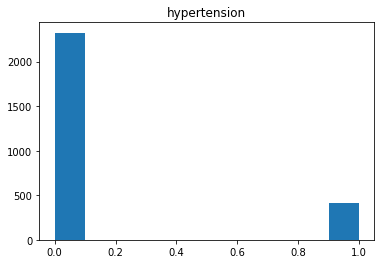

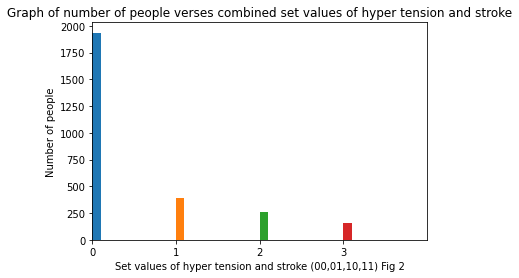

In [3172]:
#Question 1(a) Answer:

processed_data = preprocess("stroke_update.csv")

headers = header_name(processed_data)

values = transpose_file_data(processed_data)

hypertension_column = 4

# Output of histogram for number of people vs hypertension
hist_plotter(headers, values, hypertension_column)

# Output of histogram for number of people vs (hypertension,stroke)
hist_plotter_hypertension_stroke(processed_data)

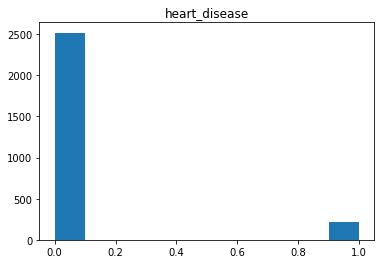

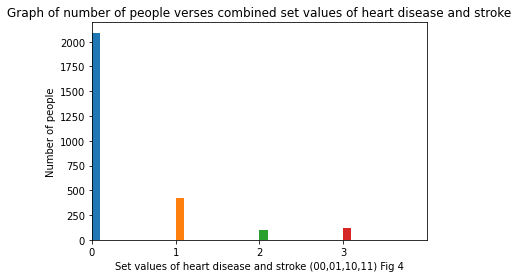

In [3173]:
#Question 1(a) Answer:

heartdisease_column = 5

# Output of histogram for number of people vs heartdisease
hist_plotter(headers, values, heartdisease_column)

# Output of histogram for number of people vs (heartdisease,stroke)
hist_plotter_heart_disease_stroke(processed_data)

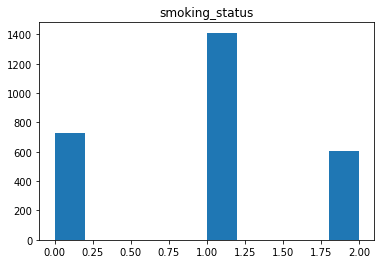

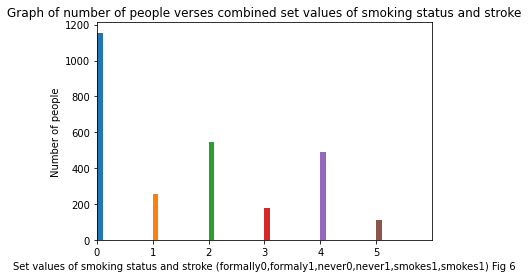

In [3174]:
#Question 1(a) Answer:

smokingstatus_column = 9

# Output of histogram for number of people vs smoking status
hist_plotter(headers, values, smokingstatus_column)

# Output of histogram for number of people vs (smoking status,stroke)
hist_plotter_smoking_stroke(processed_data)

**Q1(a) Answer:** According to prior knowledge about the correlation of hypertension, heart disease, smoking and stroke, having any heart condition, hypertension and a smoking habit increase the risk of stroke. However, in this data, there are instances where this correlation becomes weak. For example, in $Fig 2$, there are more people who have no hypertension but had a stroke $(yellow)$ than who have both $(red)$. This can be seen in $Fig 4$ as well where people who have no heart disease but had a stroke $(yellow)$ is more than who had both $(red)$. Moreover, even though there are more people in the data who formally smoked according to $Fig 5$ $(column 1.0)$. The proportion of people who formally smoked and had a stroke is far less $(yellow)$ than those who had no stroke $(blue)$.

The main issue with the data is that it is a mixture of categorical, ordinal and continuous data. For the Naive Baye's classifier to work, all the attributes except for the class will need to be either converted to categorical values first for categorical Naive Bayes' or continuous values for generative Naive Bayes'. For generative Naive Bayes' the likelihood values $P(Xm|Y)$ follow a gaussian distribution where as for categorical Naive Bayes' the likelihood values $P(Xm|Y)$ follow a categorical distribution. The class labels are categorical values and hence $P(Y)$ is categorical.

**Q1(b) Answer:** $Accuracy$ is not an appropriate metric to evaluate the models as it only provides a measure of the number of correctly labelled test classes out of all the classes. Moreover, the accuracy metric will not be a strong evaluator if the values in the dataset have an uneven distribution. To have a better understanding of the values predicted correctly, false positives and false negatives, $Precision$, $F1$ $Score$ and $Recall$ should also be calculated. For example, a learning model with training data having a larger proportion of a specific label will give a more biased result for testing data. Therefore, accuracy cannot be an appropriate metric and calculating the other listed metrics can give a better understanding of the number of correctly predicted classes and classes that have been wrongly predicted for a learning model.

### Question 2: Naive Bayes concepts and formulation

- a) Explain the independence assumption underlying Naive Bayes. What are the advantages and disadvantages of this assumption? Elaborate your answers using the features of the provided data. [no programming required]
- b) Implement the Naive Bayes classifier. You need to decide how you are going to apply Naive Bayes for nominal and numeric attributes. You can combine both Gaussian and Categorical Naive Bayes (option 1) or just using Categorical Naive Bayes (option 2). Explain your decision. For Categorical Naive Bayes, you can choose either epsilon or Laplace smoothing for this calculation. Evaluate the classifier using accuracy and appropriate metric(s) on test data. Explain your observations on how the classifiers have performed based on the metric(s). Discuss the performance of the classifiers in comparison with the Zero-R baseline.
- c) Explain the difference between epsilon and Laplace smoothing. [no programming required]

**Q2(a) Answer:** The independence assumption states that each feature in an instance given a class is independent of all the other features in the same instance. This means that all the features in an instance in a given dataset are not related to each other. The advantage is that joint probability is infeasible to calculate when there multiple features in the dataset such as the stroke dataset. Therefore, it removes the need for calculating the distribution over conditional probability $P(Y|X)$ and hence will be able to scale easily when there are too many features. The disadvantage is that in reality, data is corelated. For example in our stroke dataset, there are features included that directly affect the possible of having a stroke in real life. According to $Fig 2$ $(blue)$ $Fig 4$ $(blue)$ and $Fig 6$ $(blue)$ above, the dataset also shows signs of a corelation where a large number of people who do not have hypertension, heart disease and do not smoke also did not have a stroke.

In [3175]:
#Question 2(b) Answer: Option 2

# We ran the model for 10 iterations and averaged our results. For each time the program is tested, 
# different average values of the metrics are obtained as our `split-data` function randomly assigns 
# an instance to the training dataset or the testing dataset based on the ratio of the split. 

# Ratio is set to 0.8 to have a larger training data set than testing data set

# ratio to split the training data and testing data
ratio = 0.8

# Epsilon value set to 1e-10
epsilon = 1e-10

total_accuracy = []

total_f1 = []

total_precision = []

total_recall = []

total_baseline_accuracy = []

total_baseline_f1 = []

total_baseline_precision = []

total_baseline_recall = []

max_loop = 10

# Runs the Naive Bayes classifier for 10 iterations and find the average performance metrics
for index in range(max_loop):
    
    train_data,test_data = split_data(processed_data,ratio)

    prior,likelihood_values = train_NB(train_data,epsilon) # Train NB

    predictions = predict(test_data,prior,likelihood_values) # Predict NB

    accuracy,f1,precision,recall = evaluate(predictions,test_data) # Evaluate NB
    
    total_accuracy.append(accuracy)
    
    total_f1.append(f1)
    
    total_precision.append(precision)
    
    total_recall.append(recall)

    baseline_predicted_class = zero_R(train_data,test_data) # Calculate Baseline predictions
    
    # Evaluating Baseline predictions
    baseline_accuracy,baseline_f1,baseline_precision,baseline_recall = evaluate(baseline_predicted_class,test_data)
    
    total_baseline_accuracy.append(baseline_accuracy)
    
    total_baseline_f1.append(baseline_f1)
    
    total_baseline_precision.append(baseline_precision)
    
    total_baseline_recall.append(baseline_recall)
    
# Values are calculated and averaged
print('Accuracy: {0}, F1-score: {1}, Precision: {2}, Recall: {3}'
                  .format((np.sum(total_accuracy) / max_loop),
                  (np.sum(total_f1) / max_loop),
                  (np.sum(total_precision) / max_loop),
                 (np.sum(total_recall) / max_loop)))

print('\n')
print('Baseline Accuracy: {0}, Baseline F1-score: {1}, Baseline Precision: {2}, Baseline Recall: {3}'
                  .format((np.sum(total_baseline_accuracy) / max_loop),
                 (np.sum(total_baseline_f1) / max_loop),
                 (np.sum(total_baseline_precision) / max_loop),
                  (np.sum(total_baseline_recall) / max_loop)))

Accuracy: 0.7802919708029197, F1-score: 0.44918946709486784, Precision: 0.44689600568478244, Recall: 0.45246152373435466


Baseline Accuracy: 0.8014598540145986, Baseline F1-score: 0.0, Baseline Precision: 0.0, Baseline Recall: 0.0


**Q2(b) Answer:** We decided to go with Categorial Naive Bayes only $(option 2)$ and epsilon smoothing for our model. Categorical Naive Bayes was chosen because Gaussian Naive Bayes theorem is based on Gaussian distribution which is based on Gaussian assumption. Naive Bayes makes an assumption on the distribution shape and therefore would not give us the true performance metrics of our model.

Based on the metrics we estimated the accuracy of the model to be around $\approx 0.780$. Our $F1-score$, $Accuracy$ and $Recall$ all come to around $\approx 0.44$ which are close to middle. This means that our model is calculating less truly positive values. Also for the same true positive values, our classifier is predicting similiar false positive and false negative values. This could be due to bias in data created by converting numerical values to categorical values. 

When comparing with $Zero-R$ baseline rule. We again obtained a similar performance with $\approx 0.801$. The other metrics were $0$ for $Zero-R$ rule due to zero division. This means that our classifier's performance is close to baseline which means there was no prediction improvements by it. One reason could be due to usage of holdout method used for the spliting of data into training and test datasets and proper distribution was not obtained in the datasets.
   


**Q2(c) Answer:** In epsilon smoothing, when we calculate $P(Xm|Y) = 0$, we replace the $0$ value with a very small constant called $\epsilon$. This constant needs to be very small as we do not want other probabilistic values in our model to be shadowed. Therefore the ideal value is considered to be $1 + \epsilon \approx 1$. In Laplace smoothing, a pseudocount $\alpha$ is added to each feature count during training of the model. Most offen the value set to $1$. The values of $P(Xm|Y)$ is then recalculated by the formula: $$\frac{\alpha + count(y = k,Xm = j)}{M\alpha + count(y = k)}$$ where $M$ is the different possible values of $Xm$.

### Question 3: Model Comparison
- a) Implement the K-NN classifier, and find the optimal value for K. 
- b) Based on the obtained value for K in question 3 (a), evaluate the classifier using accuracy and chosen metric(s) on test data. Explain your observations on how the classifiers have performed based on the metric(s). Discuss the performance of the classifiers in comparison with the Zero-R baseline.
- c) Compare the classifiers (Naive Bayes and K-NN) based on metrics' results. Provide a comparatory discussion on the results. [no programming required]

In [3176]:
#Question 3(a) Answer:

# We ran the model for 10 iterations and averaged our results. This is to have a fair comparison with 
# NB classifier. For each time the program is tested, different average values of the metrics 
# are obtained as our `split-data` function randomly assigns an instance to the training 
# dataset or the testing dataset based on the ratio of the split. 

# Ratio is set to 0.8 to have a larger training data set than testing data set

# ratio to split the training data and testing data
ratio = 0.8

# Initial K value set to 50 to obtain the optimal K value over multiple iterations
K = 50

max_loop = 10

max_accuracy = [0]*K

optimal_K = []

# Runs the KNN classifier for 10 iterations with K values from 1 to 50 and find the average performance metrics
for neighbour in range(K):
    
    total_iter_accuracy = 0
    
    for index in range(max_loop):

        train_data,test_data = split_data(processed_data,ratio) # Splitting of data

        predictions = KNN(train_data,test_data,K) # Predict KNN

        accuracy,f1,precision,recall = evaluate(predictions,test_data) # Evaluate KNN
        
        total_iter_accuracy += accuracy
        
    max_accuracy[neighbour] = max_accuracy[neighbour] + total_iter_accuracy
    
for value in max_accuracy:
    optimal_K.append(value / max_loop)

print('Optimal K: {0}'.format(optimal_K.index(max(optimal_K))))


Optimal K: 25


**Q3(a) Answer:** For this iteration set we obtained an optimal $K$ value of $25$. However, the value will change if the iterative set is ran again due to handout of a random train and test dataset during each run. In our case the value has been obtained as an odd value however, since we are iterating over all the values of K from 1 to 50 and calculating the average to find the maximum average accuracy, an even value could also be obtained. 

In [3177]:
#Question 3(b) Answer:

# We ran the model for 10 iterations and averaged our results. This is to have a fair comparison with 
# NB classifier. For each time the program is tested, different average values of the metrics 
# are obtained as our `split-data` function randomly assigns an instance to the training 
# dataset or the testing dataset based on the ratio of the split. 

# Ratio is set to 0.8 to have a larger training data set than testing data set

# ratio to split the training data and testing data

# Optimal value of K
K = 27

ratio = 0.8

total_accuracy = []

total_f1 = []

total_precision = []

total_recall = []

total_baseline_accuracy = []

total_baseline_f1 = []

total_baseline_precision = []
    
total_baseline_recall = []

max_loop = 10

# Runs the KNN classifier for 10 iterations and find the average performance metrics
for index in range(max_loop):

    train_data,test_data = split_data(processed_data,ratio) # Splitting of data

    predictions = KNN(train_data,test_data,K) # Predict KNN

    accuracy,f1,precision,recall = evaluate(predictions,test_data) #Evaluate KNN

    total_accuracy.append(accuracy)

    total_f1.append(f1)

    total_precision.append(precision)

    total_recall.append(recall)

    baseline_predicted_class = zero_R(train_data,test_data) # Calculate Baseline predictions

    # Evaluating Baseline predictions
    baseline_accuracy,baseline_f1,baseline_precision,baseline_recall = evaluate(baseline_predicted_class,test_data)

    total_baseline_accuracy.append(baseline_accuracy)

    total_baseline_f1.append(baseline_f1)

    total_baseline_precision.append(baseline_precision)

    total_baseline_recall.append(baseline_recall)

# Values are calculated and averaged
print('Accuracy: {0}, F1-score: {1}, Precision: {2}, Recall: {3}'
                  .format((np.sum(total_accuracy) / max_loop),
                  (np.sum(total_f1) / max_loop),
                  (np.sum(total_precision) / max_loop),
                 (np.sum(total_recall) / max_loop)))

print('\n')
print('Baseline Accuracy: {0}, Baseline F1-score: {1}, Baseline Precision: {2}, Baseline Recall: {3}'
                  .format((np.sum(total_baseline_accuracy) / max_loop),
                 (np.sum(total_baseline_f1) / max_loop),
                 (np.sum(total_baseline_precision) / max_loop),
                  (np.sum(total_baseline_recall) / max_loop)))

Accuracy: 0.8056569343065693, F1-score: 0.18196895726938334, Precision: 0.5729937216779322, Recall: 0.10940790339817993


Baseline Accuracy: 0.8007299270072993, Baseline F1-score: 0.0, Baseline Precision: 0.0, Baseline Recall: 0.0


**Q3(b) Answer:** We ran our test for $10$ iterations to reduce the computation time and obtain a fair comparison with Categorical Naive Bayes Classifier. We took the average for all the performance metrics for the $10$ iterations. The following is the performance of our KNN Classifier based on the metrics. 

Based on the metrics we estimated the $Accuracy$ of the model to be $\approx 0.806$. Our other metrics are different from each other with KNN. Our $F1-score$ comes to $\approx 0.181$. Our $Precision$ is higher approximating to $\approx 0.572$. This shows that our KNN Classifier calculated lower number of false positive values compared with the true positive values. However, the classifier calculated a larger false negatives with the same false positive value due to which our $Recall$ value approximates to $\approx 0.109$.

When compared with $Zero-R$ baseline we obtained a value of $\approx 0.800$ for $Zero-R$ baseline which is much closer to KNN accuracy but negligibally lower. All the other metrics are $0$ for $Zero-R$ baseline rule. Being slightly better, the KNN did improve the predictiability marginally. This could be due to lack of distributed data.

**Q3(c) Answer:** The KNN performed marginally better when predicting the number of true postive classes than Naive Bayes. However, it is computationally slow. Also, it is less affected by data distribution in terms of $Precision$ as it scored higher than Naive Bayes and therefore predicts lower false positives. This means that KNN is more precise in correct predictions. 

Naive Bayes, scores better in $F1-score$ and $Recall$. This means that according to our implementation Naive Bayes is better at predicting more actual positive values compared to the total set of positive values.

Furthermore, KNN also performance marginally better for categorical datasets than Naive Bayes'.

## References:

[1]: Scikit-learn.org. 2020. 3.3. Metrics And Scoring: Quantifying The Quality Of Predictions — Scikit-Learn 0.23.2 Documentation. [online] Available at: <https://scikit-learn.org/stable/modules/model_evaluation.html> [Accessed 9 September 2020].

[2]: Docs.scipy.org. 2020. Numpy.Sum — Numpy V1.10 Manual. [online] Available at: <https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.sum.html> [Accessed 7 September 2020].

[3]: Pandas.pydata.org. 2020. Pandas.Dataframe — Pandas 1.1.2 Documentation. [online] Available at: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html> [Accessed 7 September 2020].

[4]: Week 2 Workshop Introduction to Jupyter

[5]: Week 2 Coding Demo

[5]: Week 3 Workshop

[6]: Week 4 Workshop

[7]: Week 4 Coding Demo